# Ala a sbalzo caricata con carico triangolare

In [177]:
%clear all

libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file


In [178]:
%%latex
\begin{align}
\frac{dV}{dz} = -v(z) \\
\frac{dM}{dz} = -V(z)
\end{align}

<IPython.core.display.Latex object>

In [179]:
import matplotlib.pyplot as plt
from sympy import *
init_printing()
import numpy as np
import pandas as pd

In [180]:
g0 = 9.81
theq0 = 2550.6 ## N/m
thel0 = 5.0 ## m
zs = np.linspace(0,thel0,11)
zs

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [181]:
z = Symbol("z")
q0 = Symbol("q0")
l0 = Symbol("l0")
V = Function("V")
M = Function("M")
v = Function("v")

## Definizione del carico applicato v(z)

In [182]:
load = Eq(v(z),-q0/l0*z+q0)
load

### Calcolo della risultante

In [183]:
resF = integrate(load,(z,0,thel0))
theresF=round(resF.rhs.subs([(q0,theq0),(l0,thel0)]),2)
print("Risultante =",theresF,"N")

Risultante = 6376.5 N


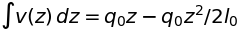

In [184]:
expr_resF = integrate(load,z)
expr_resF

In [185]:
resF2 = integrate(load,(z,0,thel0))
solve(resF2.rhs.subs([(l0,thel0)])-13500/2,q0)

In [186]:
resM = integrate(load.rhs*z,(z,0,thel0))
theresM = round(resM.subs([(q0,theq0),(l0,thel0)]),2)
print("Momento risultante =",theresM,"Nm\n")
print("Braccio =",round(theresM/theresF,3),"m")

Momento risultante = 10627.5 Nm

Braccio = 1.667 m


In [187]:
W = 2*theresF
print("Peso dell'aereo =",round(W/g0,2),"kg\n")

Peso dell'aereo = 1300.0 kg



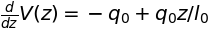

In [188]:
EqIndShear = Eq(Derivative(V(z),z),-load.rhs)
EqIndShear

### Determinazione del taglio V(z)

In [189]:
Shear = dsolve(EqIndShear,ics={V(l0):0})
Shear

In [190]:
Shear.subs([(q0,theq0),(l0,thel0)])

In [202]:
theV = []
for i in range(len(zs)):
    theV.append(Shear.rhs.subs([(q0,theq0),(l0,thel0),(z,zs[i])]))

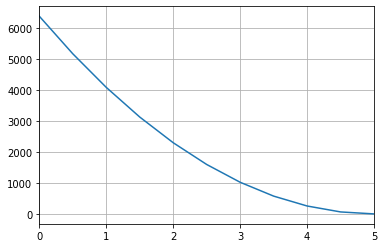

In [203]:
plt.plot(zs,theV)
plt.xlim(0,5)
plt.grid()
plt.show()

### Determinazione del momento flettente M(z)

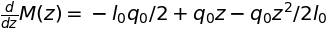

In [193]:
EqIndBending = Eq(Derivative(M(z),z),-Shear.rhs)
EqIndBending

In [194]:
Bending = dsolve(EqIndBending,ics={M(l0):0})
Bending

In [204]:
Bending.subs([(q0,theq0),(l0,thel0)])

In [205]:
theM = []
for i in range(len(zs)):
    theM.append(Bending.rhs.subs([(q0,theq0),(l0,thel0),(z,zs[i])]))

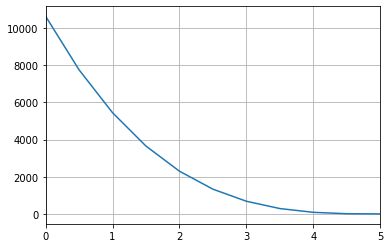

In [206]:
plt.plot(zs,theM)
plt.xlim(0,5)
plt.grid()
plt.show()

In [207]:
dataV = []
dataM = []
for i in range(len(zs)):
    dataV.append(round(theV[i],2))
    dataM.append(round(theM[i],3))
data = {"z (m)":zs,"V (N)":dataV,"M (Nm)":dataM}
df = pd.DataFrame(data)
df

,z (m),V (N),M (Nm)
0,0.0,6376.50,10627.500
1,0.5,5164.97,7747.448
2,1.0,4080.96,5441.280
3,1.5,3124.49,3645.232
4,2.0,2295.54,2295.540
5,2.5,1594.12,1328.438
6,3.0,1020.24,680.160
7,3.5,573.89,286.942
8,4.0,255.06,85.020
9,4.5,63.77,10.627


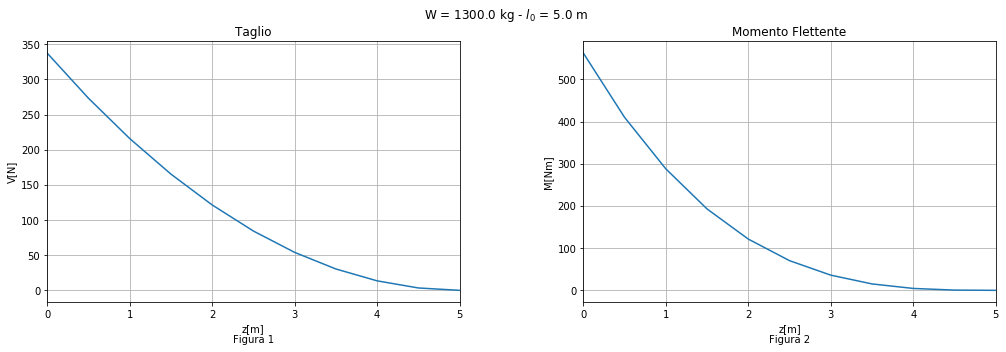

In [200]:
plt.figure(figsize=(17,4.8))
plt.suptitle("W = "+str(round(W/g0,2))+" kg - $l_0$ = "+str(thel0)+" m")
plt.subplots_adjust(wspace=0.3)
##
plt.subplot(1,2,1)
plt.title("Taglio")
plt.xlim(0,thel0)
plt.plot(zs,theV)
plt.xlim(0,thel0)
plt.xlabel("z[m]\nFigura 1")
plt.ylabel("V[N]")
plt.grid()
plt.subplot(1,2,2)
plt.title("Momento Flettente")
plt.plot(zs,theM)
plt.xlim(0,thel0)
plt.xlabel("z[m]\nFigura 2")
plt.ylabel("M[Nm]")
plt.grid()
plt.show()